In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [213]:
dados = pd.read_csv(r'C:\Cursos\Formacao_Data_Science\31.Prática em Python\dados\Credit.csv')

In [214]:
# <-- SEPARAÇÂO DOS DADOS
previsores = dados.iloc[:, 0:20].values
classe = dados.iloc[:, 20].values

In [215]:
# <-- TRANSFORMAÇÃO DOS ATRIBUTOS CATEGÓRICOS EM NUMÉRICOS
for i in range(previsores.shape[1]):
    if type((previsores[0:1, i])[0]) != int:
        labelencoder = LabelEncoder()
        previsores[:, i] = labelencoder.fit_transform(previsores[:, i])

In [216]:
# <-- DIVIDINDO OS DADOS EM TREINO E TESTE (70%/30%)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                classe,
                                                                test_size=0.30,
                                                                random_state=0)
X_teste        

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [217]:
# <-- CRIAÇÃO E TREINAMENTO DO MODELO
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [218]:
# <-- PREVISÕES ATRAVÉS DOS DADOS TESTES
previsao = naive_bayes.predict(X_teste)
previsao

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [219]:
# <-- GERAÇÂO DA MATRIX CONFUSÃO
matrix_confusao = confusion_matrix(y_teste, previsao)
matrix_confusao

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [220]:
# <-- TAXA DE ACERTO DO MODELO
taxa_acerto = accuracy_score(y_teste, previsao)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

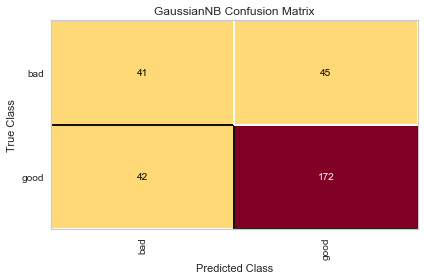

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [221]:
# VISUALIZAÇÃO DA MATRIX DE CONFUSÃO
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [233]:
# <-- PREVISÃO COM NOVO REGISTRO DE CLIENTES
novo_credito = pd.read_csv(r'C:\Cursos\Formacao_Data_Science\31.Prática em Python\dados\NovoCredit.csv')
novo_credito = novo_credito.iloc[:, 0:20].values

In [235]:
# <-- TRANSFORMAÇÃO DOS NOVOS ATRIBUTOS CATEGÓRICOS EM NUMÉRICOS
for i in range(novo_credito.shape[1]):
    if type((novo_credito[0:1, i][0])) != int:
        labelencoder = LabelEncoder()
        novo_credito[:, i] = labelencoder.fit_transform(novo_credito[:, i])

In [238]:
# <-- PREVISÃO COMO NOVO DADO
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')